In [79]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 - Metoda Gaussa-Jordana

Napisz i sprawdź funkcję rozwiązującą układ równań liniowych n × n metodą Gaussa-Jordana z częściowym poszukiwaniem elementu wiodącego. Dla dziesięciu różnych rozmiarów macierzy współczynników większych niż 500 × 500 porównaj czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych.

In [80]:
def gauss_jordan(A, B, partial_pivoting=True):
    n = A.shape[0]
    AB = np.hstack((A, B))

    # Scaling
    for i in range(n):
        AB[i] /= np.max(np.abs(A[i]))

    for i in range(n):
        if partial_pivoting:
            pivot = i + np.abs(AB[i:,i]).argmax()
            AB[[i, pivot]] = AB[[pivot, i]]

        AB[i] /= AB[i, i]

        for j in range(n):
            if i != j:
                AB[j] -= AB[j, i] * AB[i]

    return AB[:,n]

In [81]:
def random_a_b_float(n, _min=-100000, _max=100000):
    a = np.random.uniform(_min, _max, [n, n])
    b = np.random.uniform(_min, _max, [n, 1])
    return a, b

#### Partial pivoting - porównanie dokładności

In [82]:
for i in range(3):
    np.random.seed(i)
    a, b = random_a_b_float(500)
    gauss_jordan_partial_pivoting = gauss_jordan(a, b).reshape(500, 1)
    gauss_jordan_no_partial_pivoting = gauss_jordan(a, b, partial_pivoting=False).reshape(500, 1)
    np_linalg_solve = np.linalg.solve(a, b)
    print("\nTest", i + 1)
    print("[partial pivoting] Tolerancja bezwzględna 1e-11, np.allclose:", np.allclose(gauss_jordan_partial_pivoting, np_linalg_solve, rtol=0, atol=10e-11))
    print("[partial pivoting] Tolerancja bezwzględna 1e-12, np.allclose:", np.allclose(gauss_jordan_partial_pivoting, np_linalg_solve, rtol=0, atol=10e-12))
    print("[partial pivoting] Tolerancja bezwzględna 1e-13, np.allclose:", np.allclose(gauss_jordan_partial_pivoting, np_linalg_solve, rtol=0, atol=10e-13))
    print("[partial pivoting] Tolerancja bezwzględna 1e-14, np.allclose:", np.allclose(gauss_jordan_partial_pivoting, np_linalg_solve, rtol=0, atol=10e-14))
    print("[no partial pivoting] Tolerancja bezwzględna 1e-10, np.allclose:", np.allclose(gauss_jordan_no_partial_pivoting, np_linalg_solve, rtol=0, atol=10e-10))
    print("[no partial pivoting] Tolerancja bezwzględna 1e-11, np.allclose:", np.allclose(gauss_jordan_no_partial_pivoting, np_linalg_solve, rtol=0, atol=10e-11))
    print("[no partial pivoting] Tolerancja bezwzględna 1e-12, np.allclose:", np.allclose(gauss_jordan_no_partial_pivoting, np_linalg_solve, rtol=0, atol=10e-12))


Test 1
[partial pivoting] Tolerancja bezwzględna 1e-11, np.allclose: True
[partial pivoting] Tolerancja bezwzględna 1e-12, np.allclose: True
[partial pivoting] Tolerancja bezwzględna 1e-13, np.allclose: True
[partial pivoting] Tolerancja bezwzględna 1e-14, np.allclose: False
[no partial pivoting] Tolerancja bezwzględna 1e-10, np.allclose: True
[no partial pivoting] Tolerancja bezwzględna 1e-11, np.allclose: True
[no partial pivoting] Tolerancja bezwzględna 1e-12, np.allclose: False

Test 2
[partial pivoting] Tolerancja bezwzględna 1e-11, np.allclose: True
[partial pivoting] Tolerancja bezwzględna 1e-12, np.allclose: True
[partial pivoting] Tolerancja bezwzględna 1e-13, np.allclose: True
[partial pivoting] Tolerancja bezwzględna 1e-14, np.allclose: False
[no partial pivoting] Tolerancja bezwzględna 1e-10, np.allclose: True
[no partial pivoting] Tolerancja bezwzględna 1e-11, np.allclose: True
[no partial pivoting] Tolerancja bezwzględna 1e-12, np.allclose: False

Test 3
[partial pivotin

- Testujemy dokładność porównując wynik z wektorem otrzymanym przy użyciu funkcji np.linalg.solve
- Do porównania wykorzystana została funkcja np.allclose z ustawioną coraz mniejszą tolerancją bezwzględną (tolerancja względna ustawiona na 0).
- Jak widać z powyższego testu dzięki zastosowaniu partial pivotingu błąd bezwględny zmalał z rzędu ~$10^{-11}$ do rzędu ~$10^{-13}$ dla macierzy 500x500

#### Porównanie czasów Gaussa-Jordana z np.linalg.solve dla 10 macierzy większych niż 500x500

In [83]:
for n in range(550, 1001, 50):
    a, b = random_a_b_float(n)
    print(f"Macierz o rozmiarze {n}x{n}: ")

    start = time()
    gs = gauss_jordan(a, b)
    print("  Gauss-Jordan: ", round(time() - start, 6), "sekund")

    start = time()
    nls = np.linalg.solve(a, b)
    print("  np.linalg.solve: ", round(time() - start, 6), "sekund")

    print("  Weryfikacja poprawności z tolerancją bezwzględna 10e-10, np.allclose:", np.allclose(gs.reshape(n, 1), nls, rtol=0, atol=10e-10))

Macierz o rozmiarze 550x550: 
  Gauss-Jordan:  1.417964 sekund
  np.linalg.solve:  0.002946 sekund
  Weryfikacja poprawności z tolerancją bezwzględna 10e-10, np.allclose: True
Macierz o rozmiarze 600x600: 
  Gauss-Jordan:  1.653619 sekund
  np.linalg.solve:  0.003947 sekund
  Weryfikacja poprawności z tolerancją bezwzględna 10e-10, np.allclose: True
Macierz o rozmiarze 650x650: 
  Gauss-Jordan:  2.285623 sekund
  np.linalg.solve:  0.012158 sekund
  Weryfikacja poprawności z tolerancją bezwzględna 10e-10, np.allclose: True
Macierz o rozmiarze 700x700: 
  Gauss-Jordan:  2.583385 sekund
  np.linalg.solve:  0.004989 sekund
  Weryfikacja poprawności z tolerancją bezwzględna 10e-10, np.allclose: True
Macierz o rozmiarze 750x750: 
  Gauss-Jordan:  2.970941 sekund
  np.linalg.solve:  0.008094 sekund
  Weryfikacja poprawności z tolerancją bezwzględna 10e-10, np.allclose: True
Macierz o rozmiarze 800x800: 
  Gauss-Jordan:  3.605956 sekund
  np.linalg.solve:  0.013758 sekund
  Weryfikacja poprawn

#### Wykres porównujący czas działania Gaussa-Jordana z np.linalg.solve dla macierzy o rozmiarze od 100x100 do 1000x1000

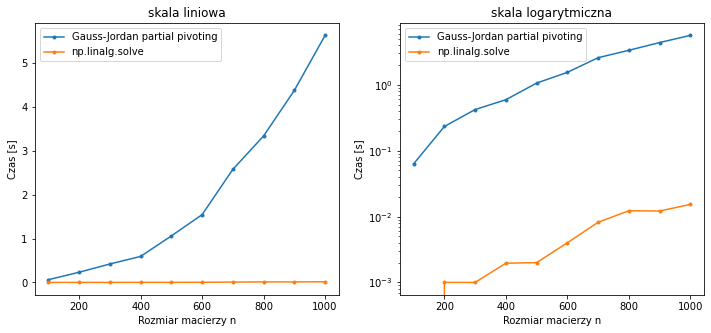

In [84]:
x = [n for n in range(100, 1001, 100)]
gs = []
nls = []
for n in x:
    a, b = random_a_b_float(n)
    start = time()
    gauss_jordan(a, b)
    gs.append(time() - start)
    start = time()
    np.linalg.solve(a, b)
    nls.append(time() - start)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for ax in axs:
    ax.plot(x, gs, marker='.', label='Gauss-Jordan partial pivoting')
    ax.plot(x, nls, marker='.', label='np.linalg.solve')
    ax.set_xlabel('Rozmiar macierzy n')
    ax.set_ylabel('Czas [s]')
    ax.legend()
axs[0].set_title('skala liniowa')
axs[1].set_title('skala logarytmiczna')
axs[1].set_yscale('log')
plt.show()

#### Wnioski

- a
- b
- c

## Zadanie 2 -  Faktoryzacja LU

Napisz i przetestuj funkcję dokonującą faktoryzacji $A = LU$ macierzy $A$ (bez poszukiwania elementu wiodącego). Sprawdź poprawność wyniku obliczając $||A − LU||$. Zadbaj o to żeby implementacja była in-situ. Elementy macierzy $L$ to współczynniki mnożenia umożliwiające wyzerowanie odpowiedniego współczynnika macierzy $A$ w trakcie procesu eliminacji.

In [93]:
def lu_factorization(A):
    n = A.shape[0]

    for i in range(n):
        for j in range(i + 1, n):
            A[j, i + 1:] -= (A[j, i] / A[i, i]) * A[i,i + 1:]
            A[j, i] = (A[j, i] / A[i, i])

    return A


def is_lu_factorization_correct(A, LU):
    n = LU.shape[0]
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        U[i, i:] = LU[i, i:]
        L[i, :i] = LU[i, :i]
        L[i, i] = 1

    is_close = np.allclose(A, np.matmul(L, U), rtol=0, atol=10e-6)
    norm = np.linalg.norm(A - np.matmul(L, U))
    return is_close, norm

Zgodnie z poleceniem sprawdzamy poprawność rozwiązania obliczając normę $||A − LU||$, używając funkcji np.linalg.norm, która domyślnie obliczba normę Frobieniusa czyli pierwiastek z sumy kwadratów wszystkich elementów macierzy. Dodatkowo weryfikuję poprawność funkcją np.allclose z ustawioną tolerancją bezwzględną $10^{-6}$.

In [94]:
for i in range(1, 6):
    a, _ = random_a_b_float(100 * i)

    lu = lu_factorization(a.copy())
    is_close, norm = is_lu_factorization_correct(a, lu)

    print(f"Macierz o rozmiarze {100 * i}x{100 * i}:")
    print(f"  Norma Frobieniusa ||A - LU|| = ", norm)
    print(f"  Weryfikacja poprawności z tolerancją bezwzględną 10e-6, np.allclose:", is_close)

Macierz o rozmiarze 100x100:
  Norma Frobieniusa ||A - LU|| =  6.687556658874617e-07
  Weryfikacja poprawności z tolerancją bezwzględną 10e-6, np.allclose: True
Macierz o rozmiarze 200x200:
  Norma Frobieniusa ||A - LU|| =  2.264384053727218e-06
  Weryfikacja poprawności z tolerancją bezwzględną 10e-6, np.allclose: True
Macierz o rozmiarze 300x300:
  Norma Frobieniusa ||A - LU|| =  1.8089927855506165e-05
  Weryfikacja poprawności z tolerancją bezwzględną 10e-6, np.allclose: True
Macierz o rozmiarze 400x400:
  Norma Frobieniusa ||A - LU|| =  6.290663050842166e-05
  Weryfikacja poprawności z tolerancją bezwzględną 10e-6, np.allclose: False
Macierz o rozmiarze 500x500:
  Norma Frobieniusa ||A - LU|| =  9.364460400069032e-06
  Weryfikacja poprawności z tolerancją bezwzględną 10e-6, np.allclose: True


- a
- b
- c

## Zadanie 3 - Analiza obwodu elektrycznego

Napisz program, który:
 - Wczytuje z pliku listę krawędzi grafu nieskierowanego ważonego opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu identyfikowane są przez liczby naturalne.
 - Wczytuje dodatkowo trójkę liczb (s, t, E), przy czym para (s, t) wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny SEM można zaniedbać.
 - Wykorzystując prawa Kirchhoffa (albo metodę potencjałów węzłowych) znajduje natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci grafu ważonego z etykietami (wizualizacja grafu wraz z kolorowymi krawędziami pokazującymi wartość natężenia prądu oraz jego kierunek)
 - Przedstaw (wizualizacja + automatyczne sprawdzenie poprawności wyników) działanie programu dla grafów spójnych mających od 15 do 200 wierzchołków. Rozważ
    następujące typy grafów:
    - Spójny graf losowy (Erdos-Renyi)
    - Graf 3-regularny (kubiczny)
    - Graf złożony z dwóch grafów losowych połaczonych mostkiem
    - Graf siatka 2D
    - Graf typu small-world
 - Skomentuj wybrane rozwiązanie - prawa Kirchoffa I, II vs. metoda potencjałów węzłowych. W przypadku korzystania z praw Kirchoffa - w jaki sposób możemy rozwiązać nadokreślony układ równań. Opisz najważniejsze aspekty swojego rozwiązania (kierunek prądu, weryfikacja poprawności rozwiązania, sposób wyznaczania cykli prostych).


In [87]:
from zad3 import electric_circuit_nodal_analysis, electric_circuit_kirchhoff_laws, is_solution_correct
import networkx as nx

Działanie programu:
 - Program korzysta z bibliotek:
   - NetworkX - do reprezenacji grafu
   - NumPy - do rozwiązywania układów równań liniowych
   - Matplotlib - do rysowania grafu (funkcje do rysowania biblioteki NetworkX korzystają z Matplotliba)
 - Program został zaimplementowany w pliku zad3.py, aby przedstawić jego działanie, importowane są następujące funkcje:
   - electric_circuit_kirchhoff_laws - korzystając z praw Kirchhoffa znajduje natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci grafu
   - electric_circuit_nodal_analysis - wykorzystuje metodę potencjałów węzłowych do znalezienia natężenia prądu w każdej części obwodu i przedstawia wyniki na rysunku w postaci grafu
   - is_solution_correct - weryfikuje poprawność rozwiązania, sprawdzając czy spełnione są oba prawa Kirchhoffa
 - Testowe grafy są umieszczone w folderze tests i są wczytywane przy pomocy funkcji read_edgelist z biblioteki NetworkX.
 - Funkcje electric_circuit_kirchhoff_laws i electric_circuit_nodal_analysis przyjmują 4 argumenty pozycyjne, są to po kolei:
   - G - graf nieskierowany reprezentujący obwód elektryczny. Domyślnie przyjmowana jest wartośc rezystancji 1Ω na każdej krawędzi, jeśli chcemy ustawić inne wartości, należy przypisać do każdej krawędzi właściwość "R" określającą wartość rezystancji [dokumentacja - networkx.Graph.edges](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.edges.html)
   - s - węzeł początkowy SEM
   - t - węzeł końcowy SEM
   - E - wartość siły elektromotorycznej w Voltach
 - Funkcje te przyjmują również kilka argumentów nazwanych z wartościami domyślnymi, które służą do dostosowywania opcji rysowania grafu.
 - Funkcje oprócz rysowania grafu, zwracają również dwa grafy G i H, które reprezentują wynik i mogą być przekazane do funkcji is_solution_correct w celu weryfikacji rozwiązania.

## Testowanie działania programu

 - Testy zgodnie z treścią zadania zostały przeprowadzone dla 5 rodzajów grafów.
 - Dla każdego grafu zostało wykonane kilka testów dla różnych s i t.
 - Dla dużych grafów etykiety krawędzi zostały ukryte, aby rysunek był bardziej wyraźny. Wartość natężenia jest reprezentowana przez odpowiednie kolorowanie krawędzi, a wartość odpowiadającą danemu kolorowi można odczytać z słupka obok wykresu. Dla tych grafów przyjęta została domyślna wartość oporu na wszystkich krawędziach równa 1Ω.
 - Dla mniejszych grafów wyświetlane są etykiety przedstawiające rezystanję krawędzi oraz obliczną wartość natężenia prądu. Opry dla tych grafów zostały przypisane losowo.
 - Aby przedstawić działanie obu sposobów ( prawa Kirchoffa I, II oraz metoda potencjałów węzłowych) są one używane podczas testów na zmianę.
 - Każdy wynik jest dodatkowo weryfikowany przez funkcję is_solution_correct.

In [96]:
def print_is_correct(G, H):
    print("Wynik weryfikacji rozwiązania:", "Rozwiązanie poprawne" if is_solution_correct(G, H, 100) else "Rozwiązanie błędne")

#### Spójny graf losowy (Erdos-Renyi)

#### Graf 3-regularny (kubiczny)

In [88]:
graph = nx.read_edgelist(path="./tests/3-regular_30_nodes_random_R", nodetype=int, data=(('R', float),))
pos = nx.kamada_kawai_layout(graph)

In [ ]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 12, 27, 100, show_edge_labels=True, pos=pos)
print_is_correct(G, H)

In [ ]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 3, 12, 100, show_edge_labels=True, pos=pos)
print_is_correct(G, H)

In [ ]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 2, 18, 100, show_edge_labels=True, pos=pos)
print_is_correct(G, H)

In [ ]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 10, 25, 100, show_edge_labels=True, pos=pos)
print_is_correct(G, H)

In [7]:
graph = nx.read_edgelist(path="./tests/3-regular_100_nodes", nodetype=int)
pos = nx.kamada_kawai_layout(graph)

In [ ]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 52, 68, 100, pos=pos)
print_is_correct(G, H)

In [ ]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 40, 67, 100, pos=pos)
print_is_correct(G, H)

In [ ]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 60, 80, 100, pos=pos)
print_is_correct(G, H)

In [ ]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 12, 24, 100, pos=pos)
print_is_correct(G, H)

#### Graf siatka 2D

In [97]:
graph = nx.read_edgelist(path="./tests/grid_5x5_random_R", nodetype=int, data=(('R', float),))
pos = nx.kamada_kawai_layout(graph)

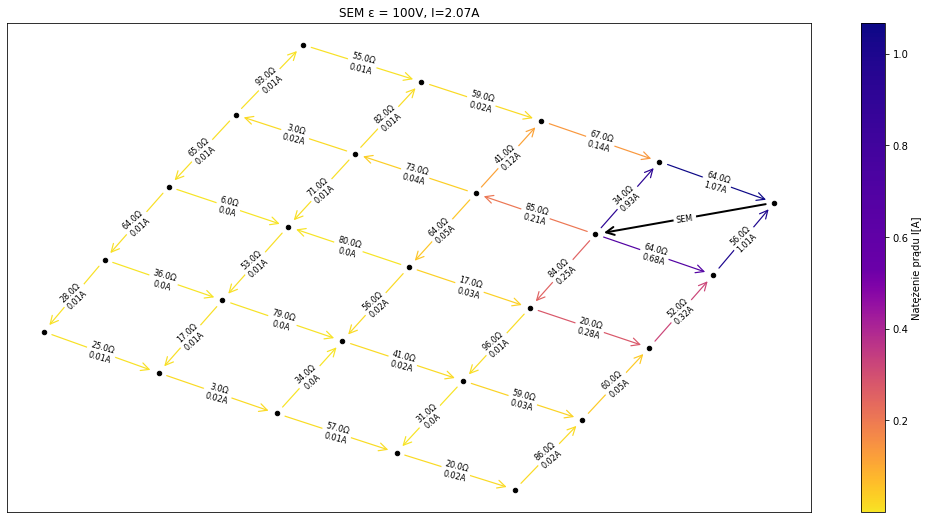

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [98]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 0, 6, 100, show_edge_labels=True, pos=pos)
print_is_correct(G, H)

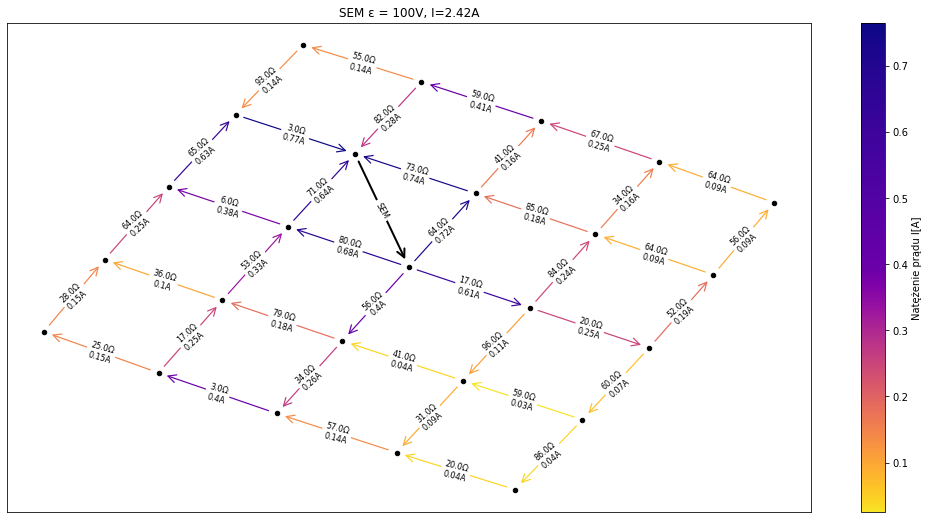

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [99]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 8, 12, 100, show_edge_labels=True, pos=pos)
print_is_correct(G, H)

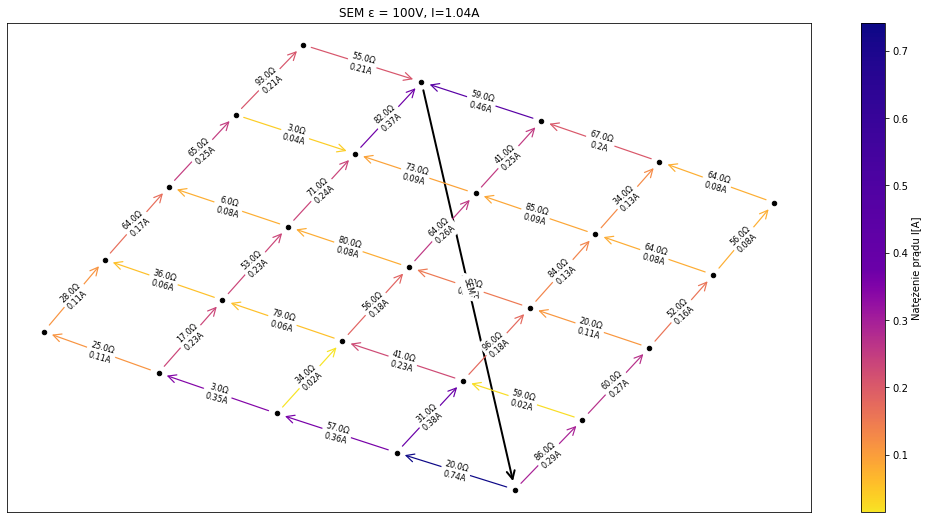

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [100]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 3, 20, 100, show_edge_labels=True, pos=pos)
print_is_correct(G, H)

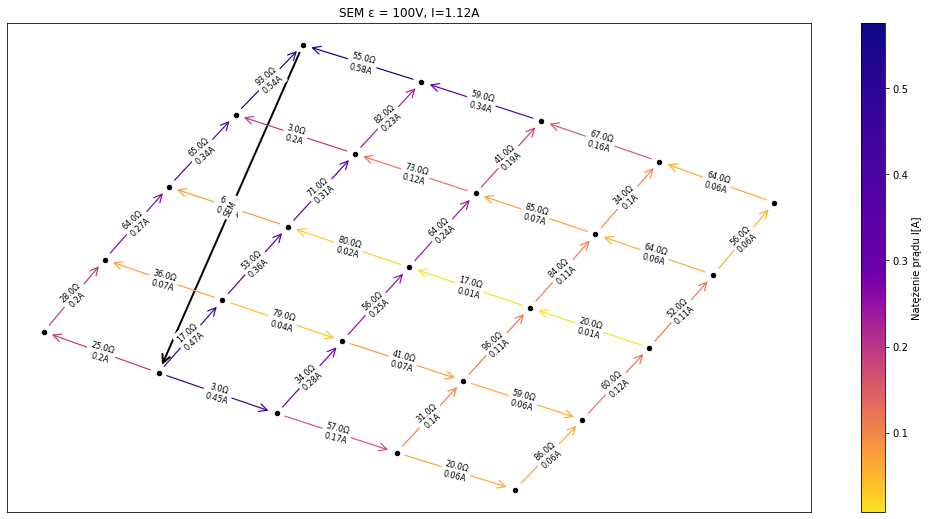

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [101]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 4, 23, 100, show_edge_labels=True, pos=pos)
print_is_correct(G, H)

In [102]:
graph = nx.read_edgelist(path="./tests/grid_16x10", nodetype=int)
pos = nx.kamada_kawai_layout(graph)

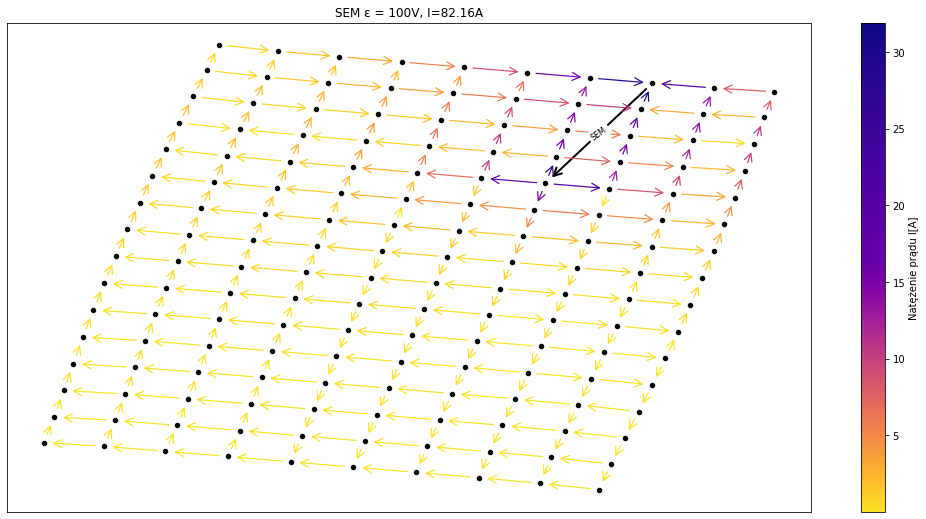

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [103]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 2, 43, 100, pos=pos)
print_is_correct(G, H)

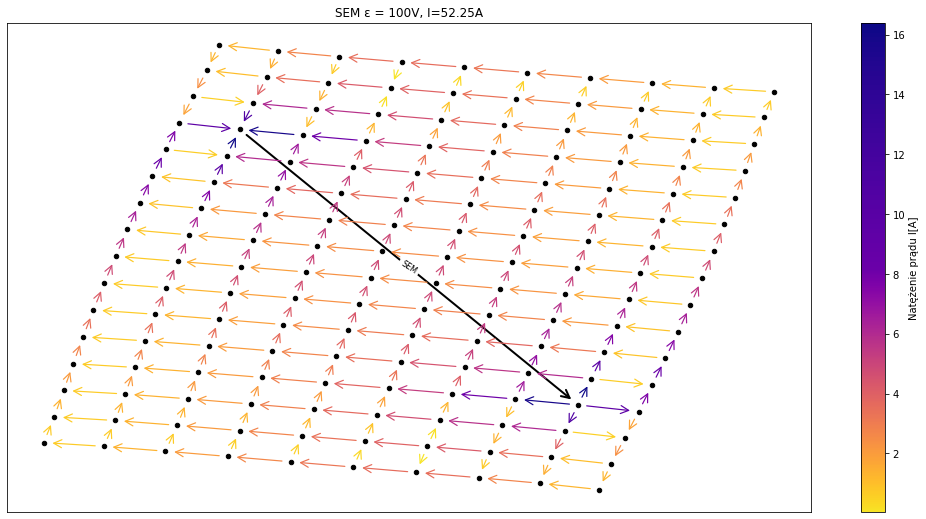

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [104]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 38, 121, 100, pos=pos)
print_is_correct(G, H)

#### Graf typu small-world

In [105]:
graph = nx.read_edgelist(path="./tests/small_world_40_nodes", nodetype=int)
pos = nx.circular_layout(graph)

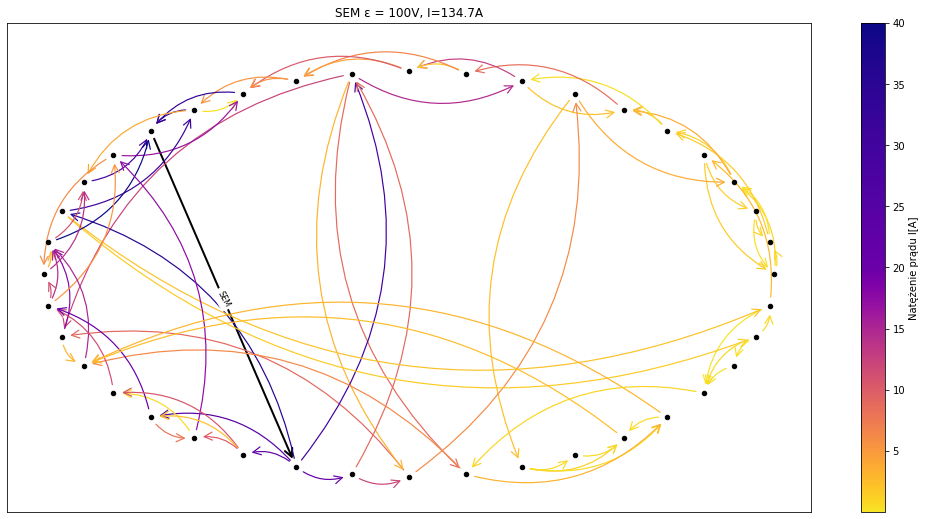

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [106]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 11, 21, 100, pos=pos, connection_style='arc3,rad=0.3')
print_is_correct(G, H)

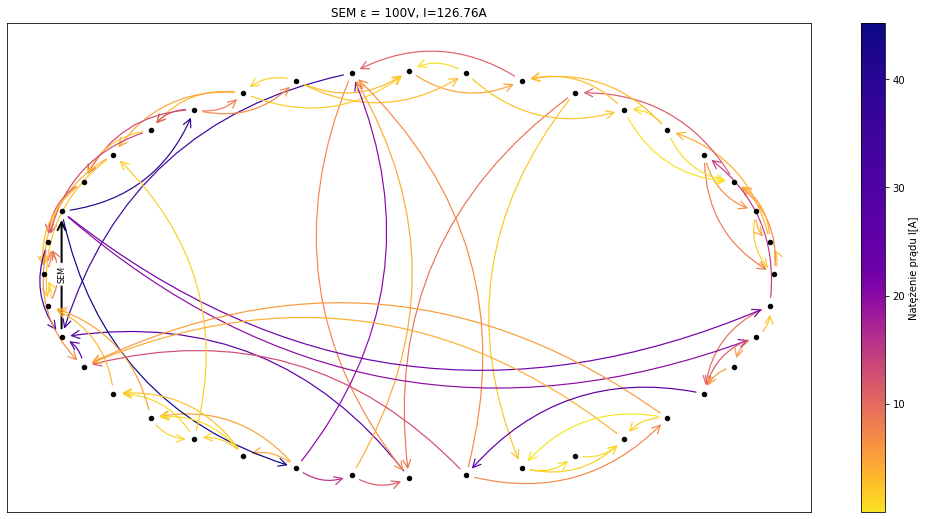

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [107]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 25, 37, 100, pos=pos, connection_style='arc3,rad=0.3')
print_is_correct(G, H)

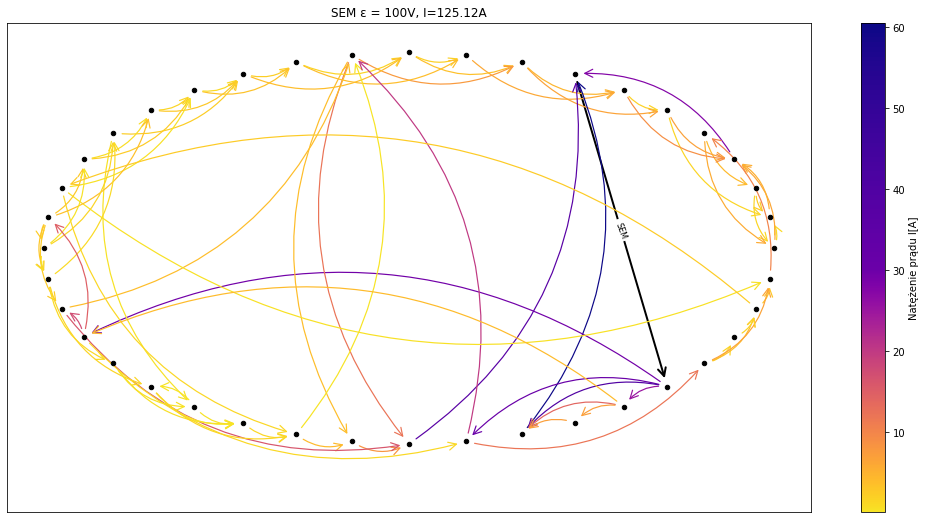

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [108]:
G, H = electric_circuit_kirchhoff_laws(graph.copy(), 26, 30, 100, pos=pos, connection_style='arc3,rad=0.3')
print_is_correct(G, H)

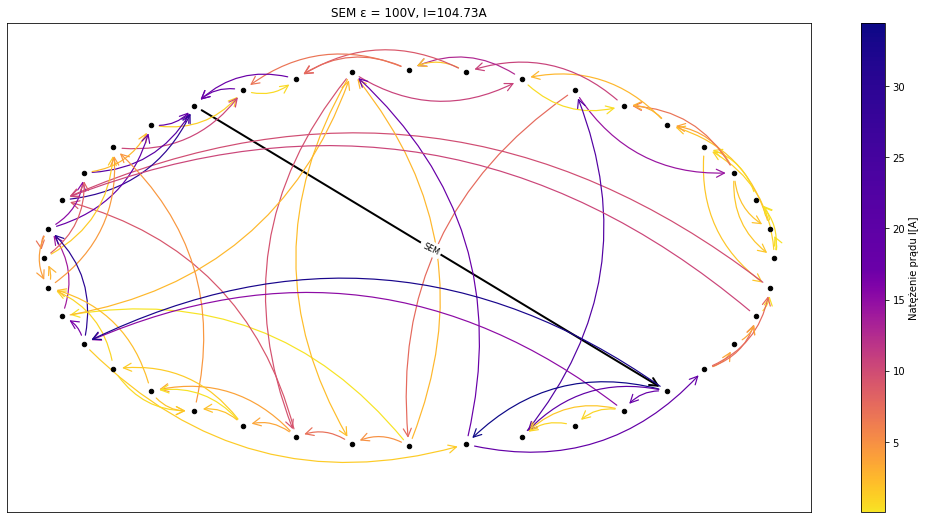

Wynik weryfikacji rozwiązania: Rozwiązanie poprawne


In [109]:
G, H = electric_circuit_nodal_analysis(graph.copy(), 10, 30, 100, pos=pos, connection_style='arc3,rad=0.3')
print_is_correct(G, H)